**Problem statement**: Building a CNN-based melanoma detection model. If melanoma is not found in its early stages, it can be fatal. It is responsible for 75% of skin cancer deaths. A system that can analyse photos and notify dermatologists of the existence of melanoma might potentially eliminate the need for a lot of manual diagnosis work.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/MyDrive/Data_hub/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/Data_hub/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

# 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

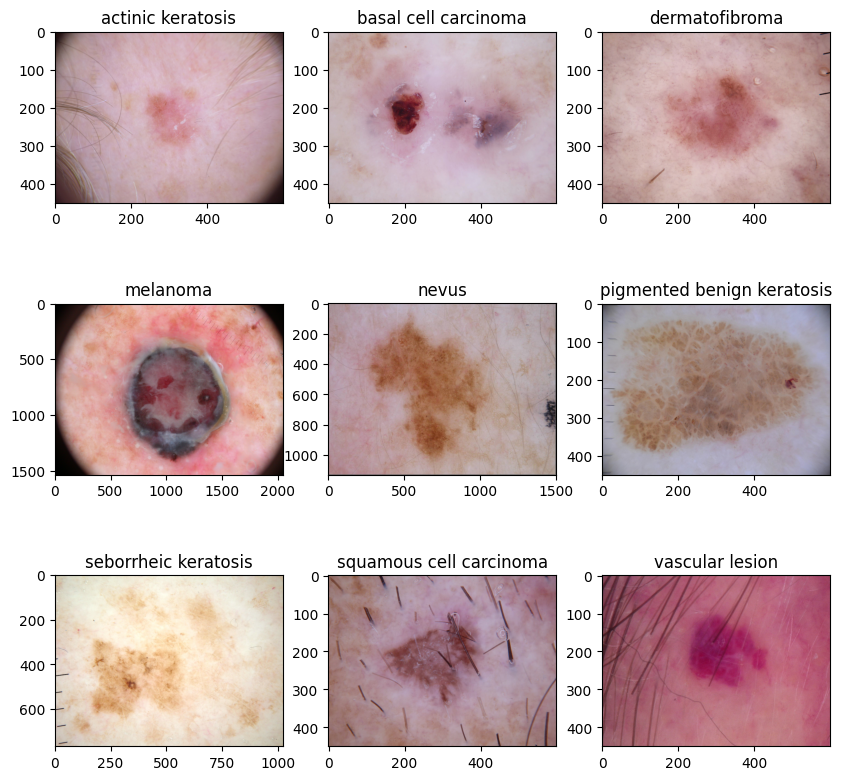

In [9]:
### your code goes here, you can use training or validation data to visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for i, class_name in enumerate(class_names):
    plt.subplot(3, 3, i + 1)
    image_paths = list(data_dir_train.glob(class_name + '/*.jpg'))

    if len(image_paths) >= 1:
        image = plt.imread(str(image_paths[0]))
        plt.title(class_name)
        plt.imshow(image)
    else:
        print(f"No image found for class {class_name}")

plt.show()


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
### Code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [12]:
###choosing an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

### Train the model

In [14]:
# Considering epochs as 30
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 438s 2s/step - loss: 2.0874 - accuracy: 0.1908 - val_loss: 2.0544 - val_accuracy: 0.1924
Epoch 2/30
56/56 [==============================] - 5s 90ms/step - loss: 2.0420 - accuracy: 0.2031 - val_loss: 2.0338 - val_accuracy: 0.1924
Epoch 3/30
56/56 [==============================] - 5s 90ms/step - loss: 2.0343 - accuracy: 0.1998 - val_loss: 2.0285 - val_accuracy: 0.2058
Epoch 4/30
56/56 [==============================] - 5s 91ms/step - loss: 2.0212 - accuracy: 0.1936 - val_loss: 2.0267 - val_accuracy: 0.2058
Epoch 5/30
56/56 [==============================] - 5s 89ms/step - loss: 2.0147 - accuracy: 0.2003 - val_loss: 2.0285 - val_accuracy: 0.2081
Epoch 6/30
56/56 [==============================] - 5s 90ms/step - loss: 2.0122 - accuracy: 0.1981 - val_loss: 2.0392 - val_accuracy: 0.2081
Epoch 7/30
56/56 [==============================] - 5s 90ms/step - loss: 2.0148 - accuracy: 0.2098 - val_loss: 2.0255 - val_accuracy: 0.2058
Epoch 8/30
56/56 [======

### Visualizing training results

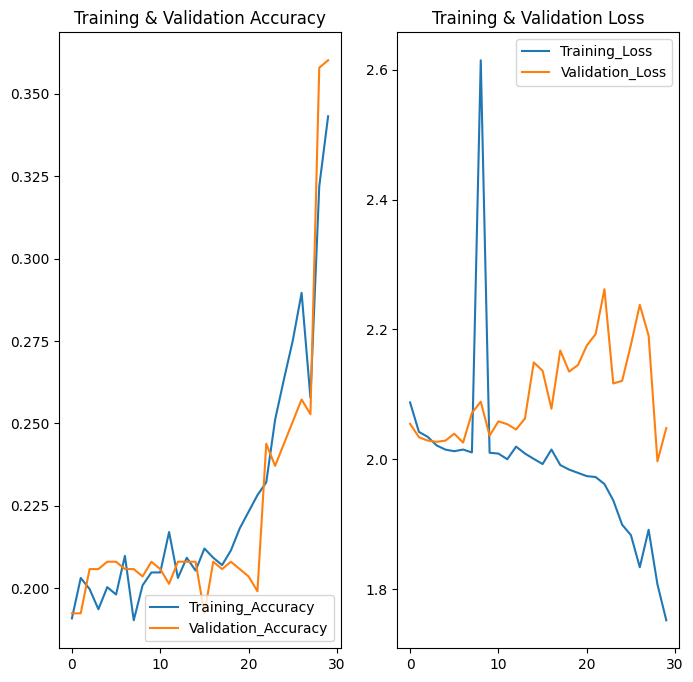

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training_Accuracy')
plt.plot(epochs_range, val_acc, label='Validation_Accuracy')
plt.legend(loc='lower right')
plt.title('Training & Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training_Loss')
plt.plot(epochs_range, val_loss, label='Validation_Loss')
plt.legend(loc='upper right')
plt.title('Training & Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit



**Finding on the 1st base model**

- Because of the differences in loss functions between training and testing during the 10th and 11th epoch, the model is overfitting.

- There are barely enough details to recall the pattern, thus the accuracy is only about 75–80%.

- However, it's still too early to weigh in on the overfitting vs. underfitting controversy.



In [16]:
# after analysing the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

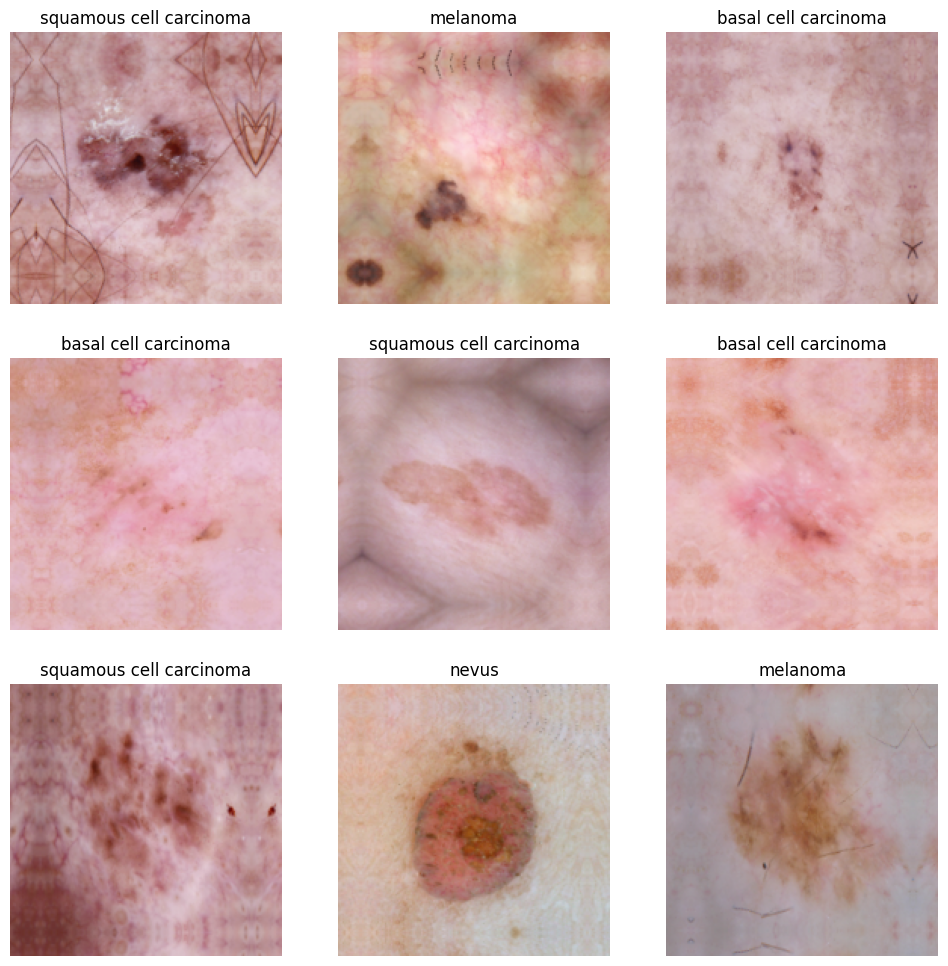

In [17]:
# Visualizing how augmentation strategy works for one instance of training image.

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [18]:
## Using Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))

])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))



### Compiling the model

In [19]:
###code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [20]:
## code goes here, note: train your model for 20 epochs
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
56/56 [==============================] - 10s 107ms/step - loss: 2.0943 - accuracy: 0.1769 - val_loss: 2.0342 - val_accuracy: 0.2058
Epoch 2/30
56/56 [==============================] - 6s 100ms/step - loss: 2.0054 - accuracy: 0.2249 - val_loss: 1.9337 - val_accuracy: 0.3087
Epoch 3/30
56/56 [==============================] - 6s 99ms/step - loss: 2.0104 - accuracy: 0.2489 - val_loss: 1.9597 - val_accuracy: 0.2081
Epoch 4/30
56/56 [==============================] - 6s 100ms/step - loss: 2.0183 - accuracy: 0.2081 - val_loss: 2.0237 - val_accuracy: 0.2371
Epoch 5/30
56/56 [==============================] - 6s 100ms/step - loss: 1.9340 - accuracy: 0.2651 - val_loss: 1.9391 - val_accuracy: 0.3110
Epoch 6/30
56/56 [==============================] - 6s 99ms/step - loss: 1.8415 - accuracy: 0.3058 - val_loss: 1.9097 - val_accuracy: 0.2595
Epoch 7/30
56/56 [==============================] - 6s 100ms/step - loss: 1.7191 - accuracy: 0.3610 - val_loss: 2.1220 - val_accuracy: 0.3647
Epoch 8

### Visualizing the results

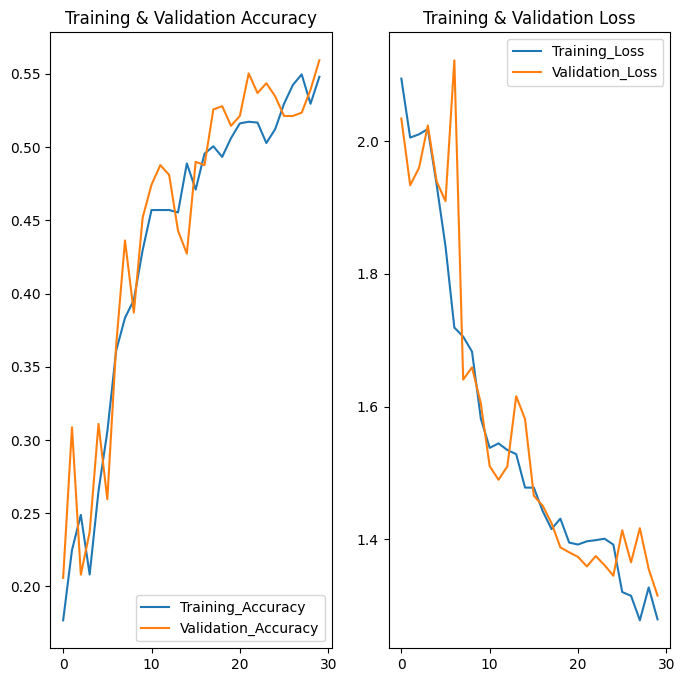

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training_Accuracy')
plt.plot(epochs_range, val_acc, label='Validation_Accuracy')
plt.legend(loc='lower right')
plt.title('Training & Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training_Loss')
plt.plot(epochs_range, val_loss, label='Validation_Loss')
plt.legend(loc='upper right')
plt.title('Training & Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

**Finding from 2nd Model**

- Accuracy is unchanged, but it is clear that the overfitting issue has been resolved as a result of data augmentation.

- It's too early to pass judgement because we can expand the epochs to boost the accuracy.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [22]:
##
path_list=[]
lesion_list=[]
for i in class_names:

    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/Data_hub/Skin cancer IS...,actinic keratosis
1,/content/drive/MyDrive/Data_hub/Skin cancer IS...,actinic keratosis
2,/content/drive/MyDrive/Data_hub/Skin cancer IS...,actinic keratosis
3,/content/drive/MyDrive/Data_hub/Skin cancer IS...,actinic keratosis
4,/content/drive/MyDrive/Data_hub/Skin cancer IS...,actinic keratosis
...,...,...
2234,/content/drive/MyDrive/Data_hub/Skin cancer IS...,vascular lesion
2235,/content/drive/MyDrive/Data_hub/Skin cancer IS...,vascular lesion
2236,/content/drive/MyDrive/Data_hub/Skin cancer IS...,vascular lesion
2237,/content/drive/MyDrive/Data_hub/Skin cancer IS...,vascular lesion


In [23]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/Data_hub/Skin cancer IS...,actinic keratosis
1,/content/drive/MyDrive/Data_hub/Skin cancer IS...,actinic keratosis
2,/content/drive/MyDrive/Data_hub/Skin cancer IS...,actinic keratosis
3,/content/drive/MyDrive/Data_hub/Skin cancer IS...,actinic keratosis
4,/content/drive/MyDrive/Data_hub/Skin cancer IS...,actinic keratosis
...,...,...
2234,/content/drive/MyDrive/Data_hub/Skin cancer IS...,vascular lesion
2235,/content/drive/MyDrive/Data_hub/Skin cancer IS...,vascular lesion
2236,/content/drive/MyDrive/Data_hub/Skin cancer IS...,vascular lesion
2237,/content/drive/MyDrive/Data_hub/Skin cancer IS...,vascular lesion


<BarContainer object of 9 artists>

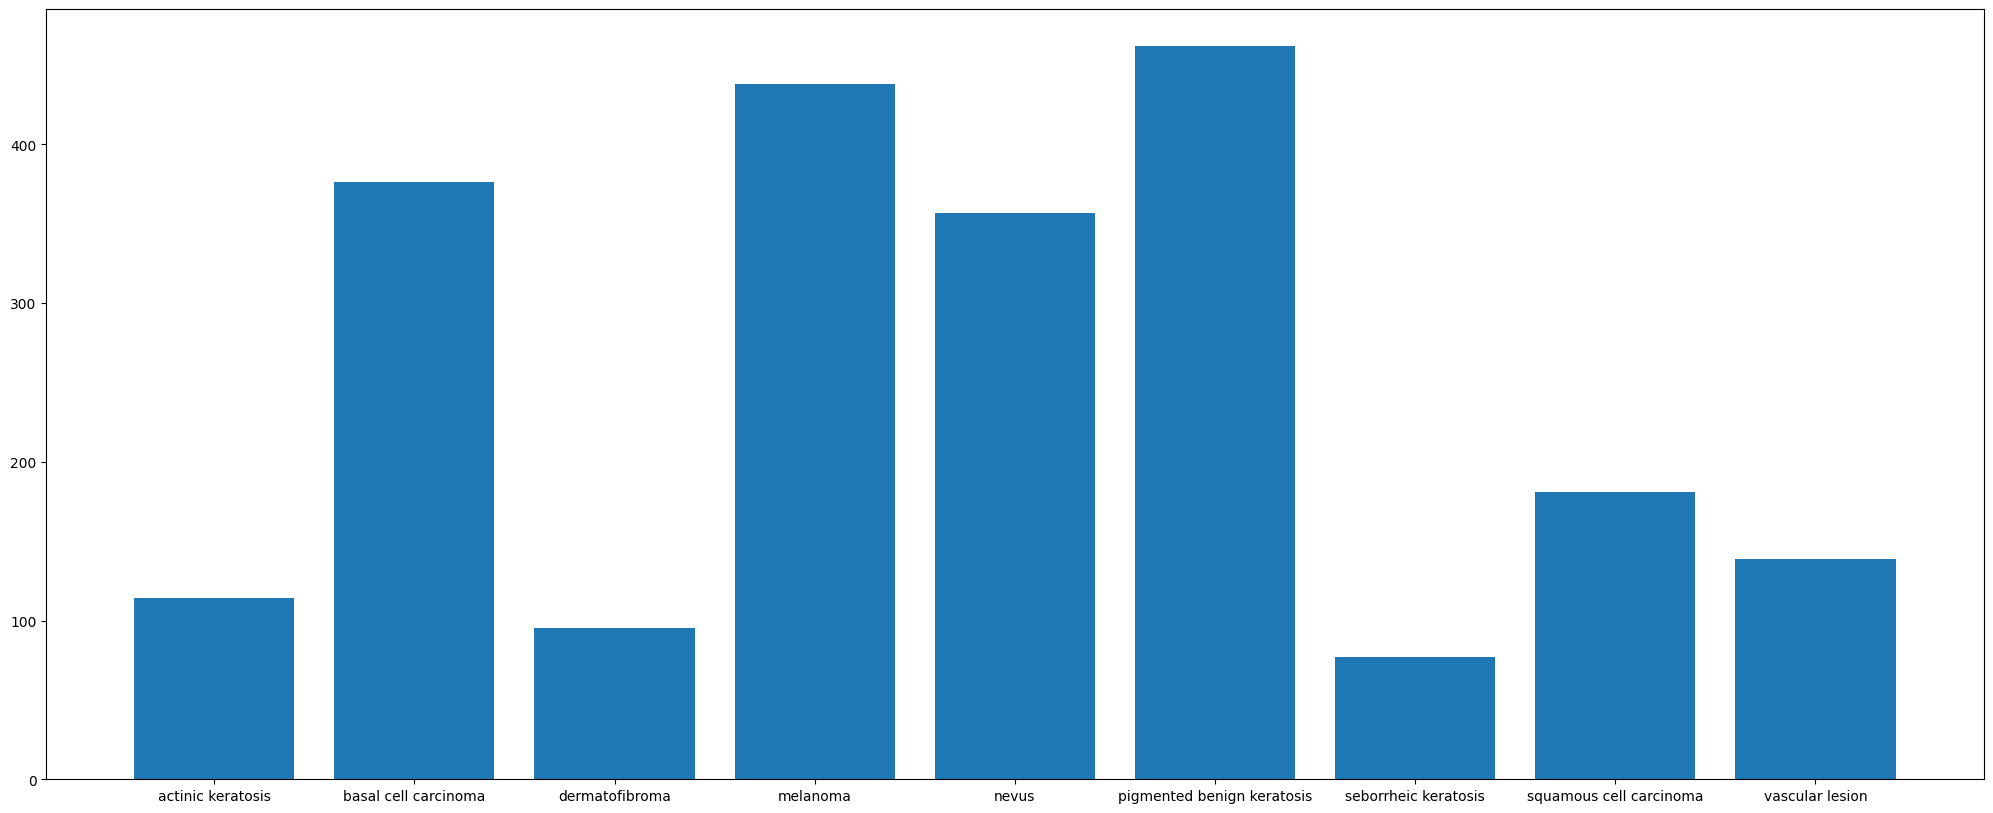

In [ ]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


Answer-1 :- The **squamous cell carcinoma** contains the fewest samples.

Answer-2:- There are proportionately more classes for **dermatofibroma** and **actinic** **keratosis**.
The number of classes for **pigmented benign keratoses and melanoma** is proportional.

In [24]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [25]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [26]:
#path_to_training_dataset="/content/drive/MyDrive/Data_hub/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("/content/drive/MyDrive/Data_hub/Skin cancer ISIC The International Skin Imaging Collaboration/Train",save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Data_hub/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0ED4EBFC70>: 100%|██████████| 500/500 [01:12<00:00,  6.91 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Data_hub/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0E46520280>: 100%|██████████| 500/500 [00:57<00:00,  8.67 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Data_hub/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0ED4E8A8F0>: 100%|██████████| 500/500 [00:58<00:00,  8.59 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Data_hub/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F0E4656DE70>: 100%|██████████| 500/500 [00:55<00:00,  9.06 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Data_hub/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0E4631A530>: 100%|██████████| 500/500 [00:46<00:00, 10.74 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Data_hub/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0E46654160>: 100%|██████████| 500/500 [00:48<00:00, 10.40 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Data_hub/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0ED41637F0>: 100%|██████████| 500/500 [00:45<00:00, 11.04 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Data_hub/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0ED4EF6D70>: 100%|██████████| 500/500 [00:56<00:00,  8.79 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Data_hub/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7F0E4654B2B0>: 100%|██████████| 500/500 [01:01<00:00,  8.13 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [27]:
data_dir_train1 = pathlib.Path("/content/drive/MyDrive/Data_hub/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)


4500


In [28]:
##
for i in class_names:

    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/drive/MyDrive/Data_hub/Skin cancer IS...,actinic keratosis
1,/content/drive/MyDrive/Data_hub/Skin cancer IS...,actinic keratosis
2,/content/drive/MyDrive/Data_hub/Skin cancer IS...,actinic keratosis
3,/content/drive/MyDrive/Data_hub/Skin cancer IS...,actinic keratosis
4,/content/drive/MyDrive/Data_hub/Skin cancer IS...,actinic keratosis
...,...,...
6734,/content/drive/MyDrive/Data_hub/Skin cancer IS...,vascular lesion
6735,/content/drive/MyDrive/Data_hub/Skin cancer IS...,vascular lesion
6736,/content/drive/MyDrive/Data_hub/Skin cancer IS...,vascular lesion
6737,/content/drive/MyDrive/Data_hub/Skin cancer IS...,vascular lesion


### Lets see the distribution of augmented data after adding new images to the original training data.

In [29]:
new_df['Label'].value_counts()

pigmented benign keratosis    1380
melanoma                      1343
basal cell carcinoma          1118
nevus                         1078
squamous cell carcinoma        538
vascular lesion                416
actinic keratosis              348
dermatofibroma                 285
seborrheic keratosis           233
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [30]:
batch_size = 32
img_height = 180
img_width = 180

In [31]:
import pathlib
#data_dir_train1=pathlib.Path("/content/drive/MyDrive/Data_hub/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")
data_dir_train1=pathlib.Path("/content/drive/MyDrive/Data_hub/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

In [32]:
data_dir_train1

PosixPath('/content/drive/MyDrive/Data_hub/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

#### **Todo:** Create a training dataset

In [33]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

2239


In [34]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


data_dir_train1=pathlib.Path("/content/drive/MyDrive/Data_hub/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [35]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [36]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))

])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [37]:
## ### Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [38]:
epochs =50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


169/169 [==============================] - 45s 251ms/step - loss: nan - accuracy: 0.0189 - val_loss: nan - val_accuracy: 0.0230
Epoch 2/50
169/169 [==============================] - 42s 239ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 3/50
169/169 [==============================] - 42s 239ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 4/50
169/169 [==============================] - 42s 241ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 5/50
169/169 [==============================] - 41s 239ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 6/50
169/169 [==============================] - 42s 242ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 7/50
169/169 [==============================] - 42s 239ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 8/50
169/169 [==================

#### **Todo:**  Visualize the model results

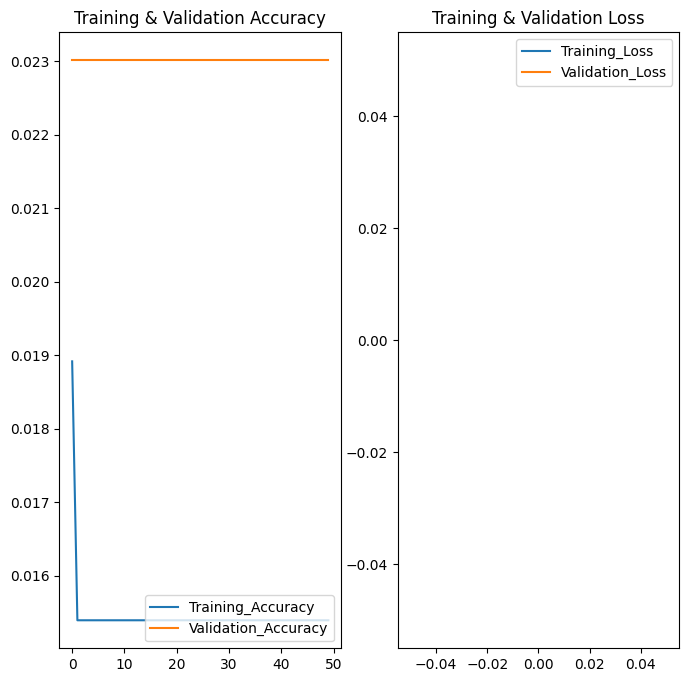

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training_Accuracy')
plt.plot(epochs_range, val_acc, label='Validation_Accuracy')
plt.legend(loc='lower right')
plt.title('Training & Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training_Loss')
plt.plot(epochs_range, val_loss, label='Validation_Loss')
plt.legend(loc='upper right')
plt.title('Training & Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



- Using the Augmentor library has improved training data accuracy.

- Model is overfitting.

- The overfitting issue can be resolved by adding additional layers, neurons, or dropout layers.

- The hyperparameter can be adjusted to further enhance the model.